# Preambule

In [1]:
library(endoR)
library(randomForest)
library(tidyverse)
library(caret)
library(ggpubr)
library(ggraph)

Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘endoR’”
Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘endoR’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘endoR’”
Warning message:
“replacing previous import ‘dplyr::union’ by ‘igraph::union’ when loading ‘endoR’”
Warning message:
“replacing previous import ‘dplyr::as_data_frame’ by ‘igraph::as_data_frame’ when loading ‘endoR’”
Warning message:
“replacing previous import ‘dplyr::groups’ by ‘igraph::groups’ when loading ‘endoR’”
Registered S3 method overwritten by 'randomForest':
  method      from
  plot.margin RRF 

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ pur

In [2]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/envs/r-ml/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggraph_2.0.4        ggpubr_0.4.0        caret_6.0-86       
 [4] lattice_0.20-41     forcats_0.5.0       stringr_1.4.0      
 [7] dplyr_1.0.2         purrr_0.3.4         readr_1.4.0        
[10] tidyr_1.1.2         tibble_3.0.4        ggplot2_3.3.2      
[13] tidyve

# Data

In [3]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

# Random forest model

In [5]:
set.seed(1313)
mod <- randomForest(Species ~ ., data = iris)
mod


Call:
 randomForest(formula = Species ~ ., data = iris) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 4%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         50          0         0        0.00
versicolor      0         47         3        0.06
virginica       0          3        47        0.06

# endoR for setosa species

In [6]:
# We will only prune and discretize decisions in 3 levels.
endo_setosa <- model2DE(model = mod, model_type = 'rf', data = select(iris, -Species), target = iris$Species
                 , classPos = 'setosa', filter = FALSE, K = 3, discretize = TRUE)

Extract rules...

Discretise data

Discretise rules



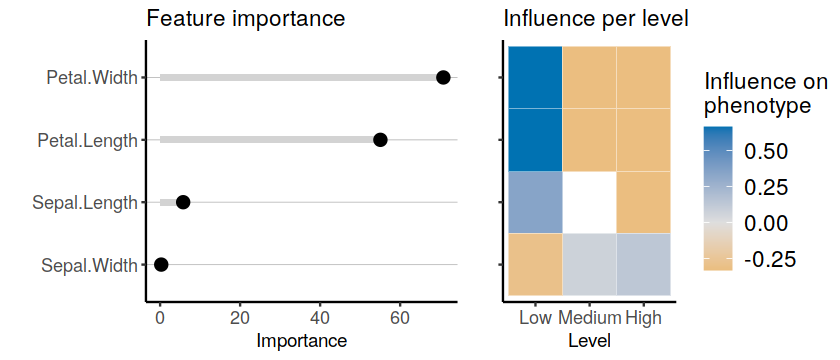

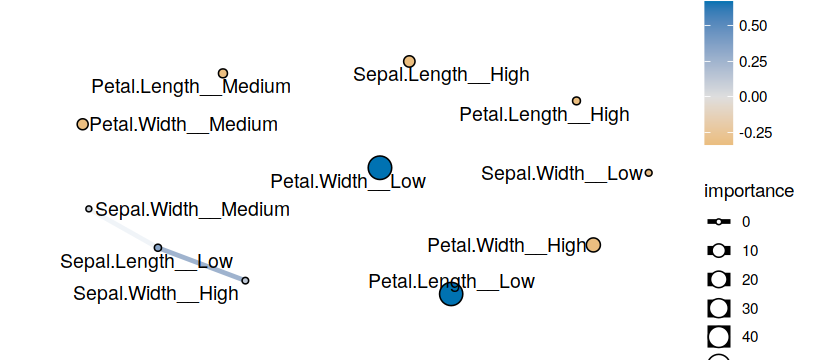

In [7]:
options(repr.plot.width=7, repr.plot.height=3)
# Plants from the setosa species have small petal and narrow long sepals. 
plotFeatures(endo_setosa, levels_order = c('Low', 'Medium', 'High'))
plotNetwork(endo_setosa, hide_isolated_nodes = FALSE, layout = 'fr')

# endoR for versicolor species

In [8]:
# This time we will filter decisions based on their importance to trim the network (filter = TRUE), we will use min_imp = 0.5 to keep at least all decisions with an importance > 0.5*the best importance (the lower min_imp, the slighter the filtering).
endo_versicolor <- model2DE(model = mod, model_type = 'rf', data = select(iris, -Species), target = iris$Species
                 , classPos = 'versicolor', K = 3, discretize = TRUE, filter = TRUE, min_imp = 0.5)

Extract rules...

Discretise data

Discretise rules

Threshold for relative importance: < 0.167 and 19 rules removed.




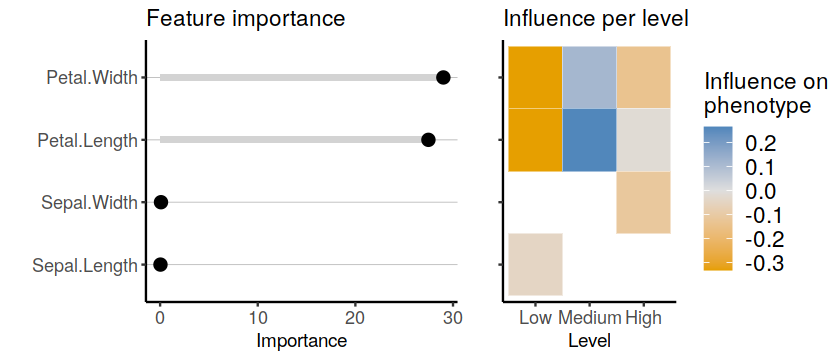

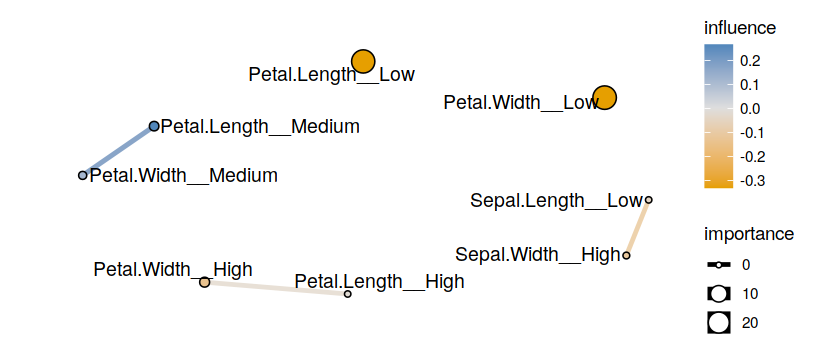

In [9]:
# The petal's proportions are intermediary compared to the setosa and virginica species. 
# Sepals have a narrow-intermediary width and long-intermediary length 
# (= if wide and small then it's not a versicolor, as seen on the network).
plotFeatures(endo_versicolor, levels_order = c('Low', 'Medium', 'High'))
plotNetwork(endo_versicolor, hide_isolated_nodes = FALSE, layout = 'fr', path_length = 3)+
  scale_edge_alpha(range = c(0.8,1))